## Homework 1 - K. V. V. Krishna Teja

### Global declaration (ideas)

In [1]:
import numpy as npy
import pandas as pds
import seaborn as sbn
import matplotlib.pyplot as mtp
#------------------------------------------------------
sbn.set()
%matplotlib inline

### Start - Import Data

In [2]:
dt = pds.read_csv("hw1_dataset.csv")
print(dt)

     x1  x2  x3   x4   x5  x6  x7   x8  x9  x10  x11  x12  x13  y
0    63   1   1  145  233   1   2  150   0  2.3    3    0    6  0
1    67   1   4  160  286   0   2  108   1  1.5    2    3    3  1
2    67   1   4  120  229   0   2  129   1  2.6    2    2    7  1
3    37   1   3  130  250   0   0  187   0  3.5    3    0    3  0
4    41   0   2  130  204   0   2  172   0  1.4    1    0    3  0
..   ..  ..  ..  ...  ...  ..  ..  ...  ..  ...  ...  ...  ... ..
295  57   1   4  130  131   0   0  115   1  1.2    2    1    7  1
296  57   0   2  130  236   0   2  174   0  0.0    2    1    3  1
297  49   1   3  120  188   0   0  139   0  2.0    2    3    7  1
298  66   1   2  160  246   0   0  120   1  0.0    2    3    6  1
299  61   1   4  138  166   0   2  125   1  3.6    2    1    3  1

[300 rows x 14 columns]


### Adding bias to existing data x0

In [3]:
dt.insert(0,"x0",1)
dt

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,1,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
296,1,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
297,1,49,1,3,120,188,0,0,139,0,2.0,2,3,7,1
298,1,66,1,2,160,246,0,0,120,1,0.0,2,3,6,1


Given equations are as below;
#### Weight update function:
$$ \theta_j := \theta_j +\alpha \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h_\theta (x^{(i)}))x^{(i)}_j  $$

#### Hypothesis Function (for logistic regression):
$$ h_\theta (x) = \frac{1}{1 + e^{-\theta^{T}x}} $$

#### Cost function:

$$ J(\theta) =  -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} log(h_\theta (x^{(i)}))+ (1-y^{(i)})log(1-h_\theta (x^{(i)}))]$$

In [4]:
#y= dt['y']
y= dt.iloc[:,-1]
print(y)

0      0
1      1
2      1
3      0
4      0
      ..
295    1
296    1
297    1
298    1
299    1
Name: y, Length: 300, dtype: int64


In [5]:
x= dt.iloc[:,:-1]
x

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,1,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,1,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,57,1,4,130,131,0,0,115,1,1.2,2,1,7
296,1,57,0,2,130,236,0,2,174,0,0.0,2,1,3
297,1,49,1,3,120,188,0,0,139,0,2.0,2,3,7
298,1,66,1,2,160,246,0,0,120,1,0.0,2,3,6


In [6]:
m = y.size
m

300

In [7]:
## Testing with selective inputs
dt_ip = dt[['x0','x1','x2']]
#dt_ip

In [8]:
j = dt_ip.shape[1]
#j

In [9]:
ones = dt_ip.loc[y == 1]
zeroes = dt_ip.loc[y == 0]
#print(ones,zeroes)

#plots - useless
mtp.scatter(ones.iloc[:, 0], ones.iloc[:, 1], s=1, label='Ones')
mtp.scatter(zeroes.iloc[:, 0], zeroes.iloc[:, 1], s=1, label='Zeroes')
mtp.legend()
mtp.show()

## Folding (x0, x1, x2 only)

In [10]:
# Split data equally

# splitting into 5 equal folds
#------------------------------------------------------
df1= npy.matrix(dt_ip.loc[0:59])
y1 = npy.matrix(y.loc[0:59]).transpose()

df2= npy.matrix(dt_ip.loc[60:119])
y2 = npy.matrix(y.loc[60:119]).transpose()

df3= npy.matrix(dt_ip.loc[120:179])
y3 = npy.matrix(y.loc[120:179]).transpose()

df4= npy.matrix(dt_ip.loc[180:239])
y4 = npy.matrix(y.loc[180:239]).transpose()

df5= npy.matrix(dt_ip.loc[240:299])
y5 = npy.matrix(y.loc[240:299]).transpose()
#------------------------------------------------------


## Plot for fold1:

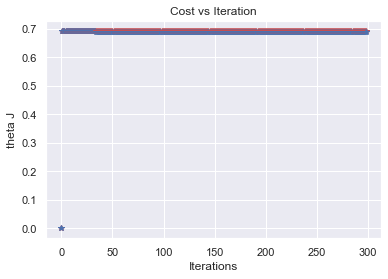

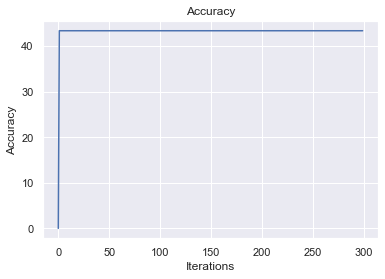

In [11]:
# Fold 1 will be trn=[df1+df2+df3] val=[df4]; tst=[df5]
fold1_ip = npy.concatenate([df1,df2,df3], axis=0)
fold1_y = npy.concatenate([y1,y2,y3], axis=0)
#------------------------------------------------------
m1 = fold1_y.size
m2 = y4.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold1_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00001
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df1+df2+df3]}
    nti = net_input(theta, fold1_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold1_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold1_y.T,npy.log(hypothesis)) + npy.dot((1-fold1_y).T,npy.log(1-hypothesis)))
    error = (fold1_y-hypothesis)
    dot = npy.dot((fold1_y-hypothesis).T, fold1_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df4]}
    nti = net_input(theta, df4)
    sg = sigmoid(nti)
    prb = probability(theta, df4)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y4.T,npy.log(hyp_v)) + npy.dot((1-y4).T,npy.log(1-hyp_v)))
    error = (y4-hyp_v)
    #dot = npy.dot((y4-hyp_v).T, df4).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df5]}
    nti = net_input(theta, df5)
    sg = sigmoid(nti)
    prb = probability(theta, df5)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y5.T,npy.log(hyp_t)) + npy.dot((1-y5).T,npy.log(1-hyp_t)))
    error = (y5-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y5))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold1_y-hypothesis).T, fold1_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold2:

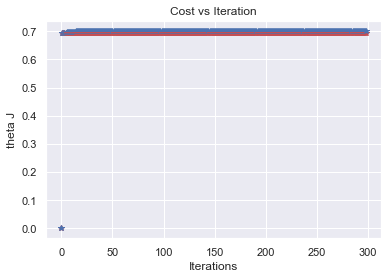

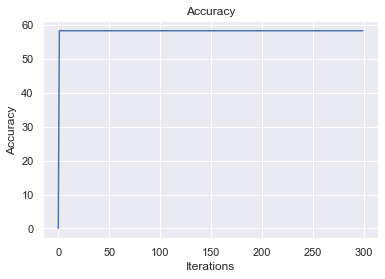

In [12]:
fold2_ip = npy.concatenate([df2,df3,df4], axis=0)
fold2_y = npy.concatenate([y2,y3,y4], axis=0)
#------------------------------------------------------
m1 = fold2_y.size
m2 = y5.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold2_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00006
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df2+df3+df4]}
    nti = net_input(theta, fold2_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold2_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold2_y.T,npy.log(hypothesis)) + npy.dot((1-fold2_y).T,npy.log(1-hypothesis)))
    error = (fold2_y-hypothesis)
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df5]}
    nti = net_input(theta, df5)
    sg = sigmoid(nti)
    prb = probability(theta, df5)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y5.T,npy.log(hyp_v)) + npy.dot((1-y5).T,npy.log(1-hyp_v)))
    error = (y5-hyp_v)
    #dot = npy.dot((y5-hyp_v).T, df5).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df1]}
    nti = net_input(theta, df1)
    sg = sigmoid(nti)
    prb = probability(theta, df1)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y1.T,npy.log(hyp_t)) + npy.dot((1-y1).T,npy.log(1-hyp_t)))
    error = (y1-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y1))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold3:

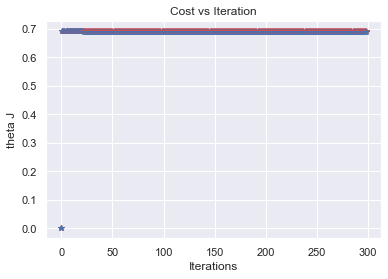

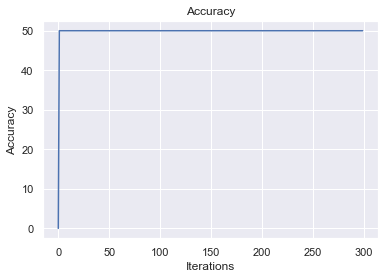

In [13]:
fold3_ip = npy.concatenate([df3,df4,df5], axis=0)
fold3_y = npy.concatenate([y3,y4,y5], axis=0)
#------------------------------------------------------
m1 = fold3_y.size
m2 = y1.size

#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold3_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00003
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df3+df4+df5]}
    nti = net_input(theta, fold3_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold3_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold3_y.T,npy.log(hypothesis)) + npy.dot((1-fold3_y).T,npy.log(1-hypothesis)))
    error = (fold3_y-hypothesis)
    dot = npy.dot((fold3_y-hypothesis).T, fold3_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df1]}
    nti = net_input(theta, df1)
    sg = sigmoid(nti)
    prb = probability(theta, df1)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y1.T,npy.log(hyp_v)) + npy.dot((1-y1).T,npy.log(1-hyp_v)))
    error = (y5-hyp_v)
    #dot = npy.dot((y5-hyp_v).T, df5).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df2]}
    nti = net_input(theta, df2)
    sg = sigmoid(nti)
    prb = probability(theta, df2)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y2.T,npy.log(hyp_t)) + npy.dot((1-y2).T,npy.log(1-hyp_t)))
    error = (y2-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y2))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold4:

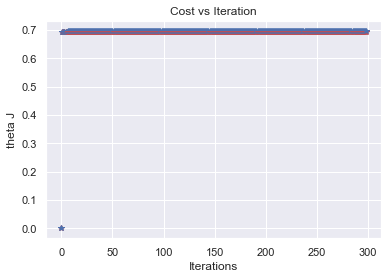

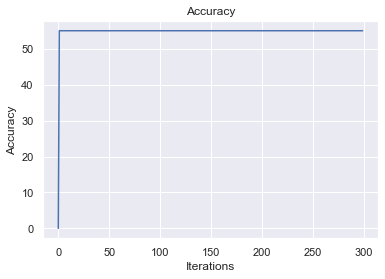

In [14]:
fold4_ip = npy.concatenate([df4,df5,df1], axis=0)
fold4_y = npy.concatenate([y4,y5,y1], axis=0)
#------------------------------------------------------
m1 = fold4_y.size
m2 = y2.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold4_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00005
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df4+df5+df1]}
    nti = net_input(theta, fold4_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold4_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold4_y.T,npy.log(hypothesis)) + npy.dot((1-fold4_y).T,npy.log(1-hypothesis)))
    error = (fold4_y-hypothesis)
    dot = npy.dot((fold4_y-hypothesis).T, fold4_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df2]}
    nti = net_input(theta, df2)
    sg = sigmoid(nti)
    prb = probability(theta, df2)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y2.T,npy.log(hyp_v)) + npy.dot((1-y2).T,npy.log(1-hyp_v)))
    error = (y2-hyp_v)
    #dot = npy.dot((y2-hyp_v).T, df2).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df3]}
    nti = net_input(theta, df3)
    sg = sigmoid(nti)
    prb = probability(theta, df3)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y3.T,npy.log(hyp_t)) + npy.dot((1-y3).T,npy.log(1-hyp_t)))
    error = (y3-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y3))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold4_y-hypothesis).T, fold4_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold5:

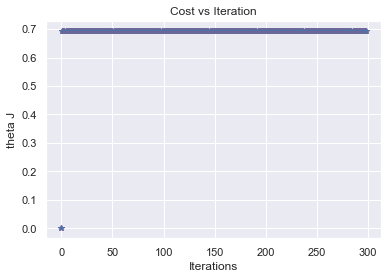

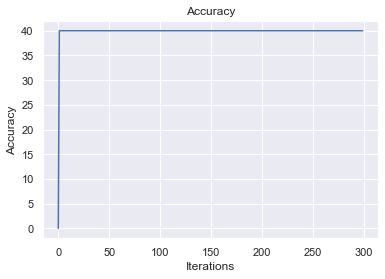

In [15]:
fold5_ip = npy.concatenate([df5,df1,df2], axis=0)
fold5_y = npy.concatenate([y5,y1,y2], axis=0)
#------------------------------------------------------
m1 = fold5_y.size
m2 = y3.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold5_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00002
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df5+df1+df2]}
    nti = net_input(theta, fold5_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold5_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold5_y.T,npy.log(hypothesis)) + npy.dot((1-fold5_y).T,npy.log(1-hypothesis)))
    error = (fold5_y-hypothesis)
    dot = npy.dot((fold5_y-hypothesis).T, fold5_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df3]}
    nti = net_input(theta, df3)
    sg = sigmoid(nti)
    prb = probability(theta, df3)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y3.T,npy.log(hyp_v)) + npy.dot((1-y3).T,npy.log(1-hyp_v)))
    error = (y3-hyp_v)
    #dot = npy.dot((y2-hyp_v).T, df2).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df4]}
    nti = net_input(theta, df4)
    sg = sigmoid(nti)
    prb = probability(theta, df4)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y4.T,npy.log(hyp_t)) + npy.dot((1-y4).T,npy.log(1-hyp_t)))
    error = (y4-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y4))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold5_y-hypothesis).T, fold5_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

# Folding (all inputs)

## Plot for fold1:

In [16]:
# Split data equally

# splitting into 5 equal folds
#------------------------------------------------------
df1= npy.matrix(dt.loc[0:59])
y1 = npy.matrix(y.loc[0:59]).transpose()

df2= npy.matrix(dt.loc[60:119])
y2 = npy.matrix(y.loc[60:119]).transpose()

df3= npy.matrix(dt.loc[120:179])
y3 = npy.matrix(y.loc[120:179]).transpose()

df4= npy.matrix(dt.loc[180:239])
y4 = npy.matrix(y.loc[180:239]).transpose()

df5= npy.matrix(dt.loc[240:299])
y5 = npy.matrix(y.loc[240:299]).transpose()
#------------------------------------------------------


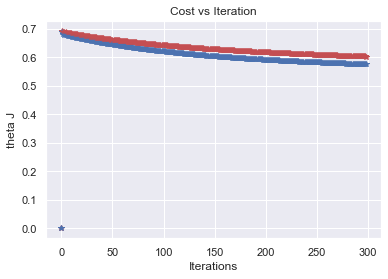

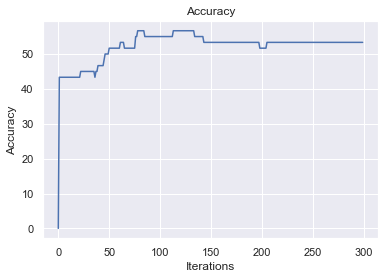

In [17]:
# Fold 1 will be trn=[df1+df2+df3] val=[df4]; tst=[df5]
fold1_ip = npy.concatenate([df1,df2,df3], axis=0)
fold1_y = npy.concatenate([y1,y2,y3], axis=0)
#------------------------------------------------------
m1 = fold1_y.size
m2 = y4.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold1_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00001
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df1+df2+df3]}
    nti = net_input(theta, fold1_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold1_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold1_y.T,npy.log(hypothesis)) + npy.dot((1-fold1_y).T,npy.log(1-hypothesis)))
    error = (fold1_y-hypothesis)
    dot = npy.dot((fold1_y-hypothesis).T, fold1_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df4]}
    nti = net_input(theta, df4)
    sg = sigmoid(nti)
    prb = probability(theta, df4)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y4.T,npy.log(hyp_v)) + npy.dot((1-y4).T,npy.log(1-hyp_v)))
    error = (y4-hyp_v)
    #dot = npy.dot((y4-hyp_v).T, df4).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df5]}
    nti = net_input(theta, df5)
    sg = sigmoid(nti)
    prb = probability(theta, df5)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y5.T,npy.log(hyp_t)) + npy.dot((1-y5).T,npy.log(1-hyp_t)))
    error = (y5-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y5))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold1_y-hypothesis).T, fold1_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold2:

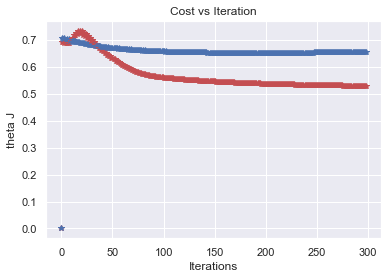

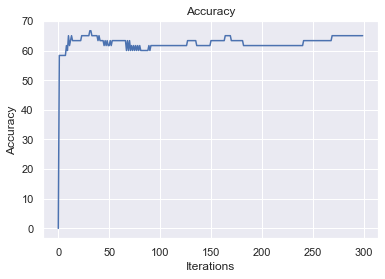

In [18]:
fold2_ip = npy.concatenate([df2,df3,df4], axis=0)
fold2_y = npy.concatenate([y2,y3,y4], axis=0)
#------------------------------------------------------
m1 = fold2_y.size
m2 = y5.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold2_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00004
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df2+df3+df4]}
    nti = net_input(theta, fold2_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold2_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold2_y.T,npy.log(hypothesis)) + npy.dot((1-fold2_y).T,npy.log(1-hypothesis)))
    error = (fold2_y-hypothesis)
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df5]}
    nti = net_input(theta, df5)
    sg = sigmoid(nti)
    prb = probability(theta, df5)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y5.T,npy.log(hyp_v)) + npy.dot((1-y5).T,npy.log(1-hyp_v)))
    error = (y5-hyp_v)
    #dot = npy.dot((y5-hyp_v).T, df5).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df1]}
    nti = net_input(theta, df1)
    sg = sigmoid(nti)
    prb = probability(theta, df1)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y1.T,npy.log(hyp_t)) + npy.dot((1-y1).T,npy.log(1-hyp_t)))
    error = (y1-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y1))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold3:

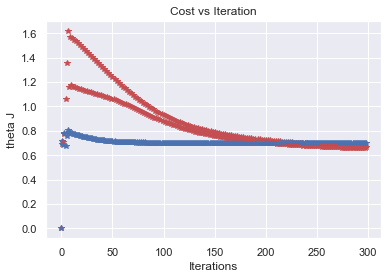

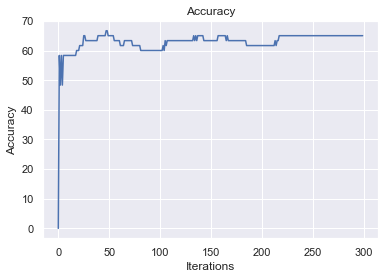

In [19]:
fold2_ip = npy.concatenate([df2,df3,df4], axis=0)
fold2_y = npy.concatenate([y2,y3,y4], axis=0)
#------------------------------------------------------
m1 = fold2_y.size
m2 = y5.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold2_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00006
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df2+df3+df4]}
    nti = net_input(theta, fold2_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold2_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold2_y.T,npy.log(hypothesis)) + npy.dot((1-fold2_y).T,npy.log(1-hypothesis)))
    error = (fold2_y-hypothesis)
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df5]}
    nti = net_input(theta, df5)
    sg = sigmoid(nti)
    prb = probability(theta, df5)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y5.T,npy.log(hyp_v)) + npy.dot((1-y5).T,npy.log(1-hyp_v)))
    error = (y5-hyp_v)
    #dot = npy.dot((y5-hyp_v).T, df5).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df1]}
    nti = net_input(theta, df1)
    sg = sigmoid(nti)
    prb = probability(theta, df1)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y1.T,npy.log(hyp_t)) + npy.dot((1-y1).T,npy.log(1-hyp_t)))
    error = (y1-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y1))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold4:

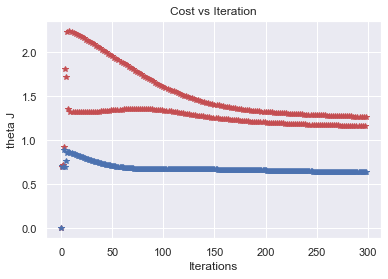

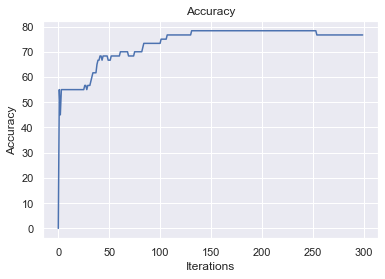

In [20]:
fold4_ip = npy.concatenate([df4,df5,df1], axis=0)
fold4_y = npy.concatenate([y4,y5,y1], axis=0)
#------------------------------------------------------
m1 = fold4_y.size
m2 = y2.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold4_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00008
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df4+df5+df1]}
    nti = net_input(theta, fold4_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold4_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold4_y.T,npy.log(hypothesis)) + npy.dot((1-fold4_y).T,npy.log(1-hypothesis)))
    error = (fold4_y-hypothesis)
    dot = npy.dot((fold4_y-hypothesis).T, fold4_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df2]}
    nti = net_input(theta, df2)
    sg = sigmoid(nti)
    prb = probability(theta, df2)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y2.T,npy.log(hyp_v)) + npy.dot((1-y2).T,npy.log(1-hyp_v)))
    error = (y2-hyp_v)
    #dot = npy.dot((y2-hyp_v).T, df2).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df3]}
    nti = net_input(theta, df3)
    sg = sigmoid(nti)
    prb = probability(theta, df3)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y3.T,npy.log(hyp_t)) + npy.dot((1-y3).T,npy.log(1-hyp_t)))
    error = (y3-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y3))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold4_y-hypothesis).T, fold4_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold5:

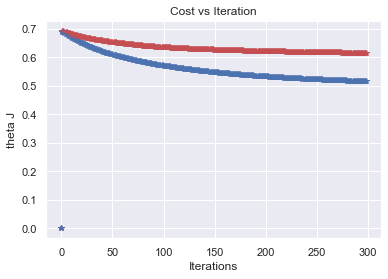

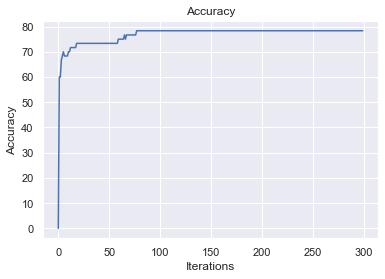

In [21]:
fold5_ip = npy.concatenate([df5,df1,df2], axis=0)
fold5_y = npy.concatenate([y5,y1,y2], axis=0)
#------------------------------------------------------
m1 = fold5_y.size
m2 = y3.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold5_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00004
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df5+df1+df2]}
    nti = net_input(theta, fold5_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold5_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold5_y.T,npy.log(hypothesis)) + npy.dot((1-fold5_y).T,npy.log(1-hypothesis)))
    error = (fold5_y-hypothesis)
    dot = npy.dot((fold5_y-hypothesis).T, fold5_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df3]}
    nti = net_input(theta, df3)
    sg = sigmoid(nti)
    prb = probability(theta, df3)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y3.T,npy.log(hyp_v)) + npy.dot((1-y3).T,npy.log(1-hyp_v)))
    error = (y3-hyp_v)
    #dot = npy.dot((y2-hyp_v).T, df2).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df4]}
    nti = net_input(theta, df4)
    sg = sigmoid(nti)
    prb = probability(theta, df4)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y4.T,npy.log(hyp_t)) + npy.dot((1-y4).T,npy.log(1-hyp_t)))
    error = (y4-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y4))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold5_y-hypothesis).T, fold5_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

# Folding (x0 -> x6)

In [22]:
## Testing with selective inputs
#dt.insert(0,"x0",1)
#dt
dt_ip = dt[['x0','x1','x2', 'x3', 'x4', 'x5','x6']]
#dt_ip
j = dt_ip.shape[1]
#j

In [23]:
# Split data equally

# splitting into 5 equal folds
#------------------------------------------------------
df1= npy.matrix(dt_ip.loc[0:59])
y1 = npy.matrix(y.loc[0:59]).transpose()

df2= npy.matrix(dt_ip.loc[60:119])
y2 = npy.matrix(y.loc[60:119]).transpose()

df3= npy.matrix(dt_ip.loc[120:179])
y3 = npy.matrix(y.loc[120:179]).transpose()

df4= npy.matrix(dt_ip.loc[180:239])
y4 = npy.matrix(y.loc[180:239]).transpose()

df5= npy.matrix(dt_ip.loc[240:299])
y5 = npy.matrix(y.loc[240:299]).transpose()
#------------------------------------------------------


## Plot for fold1:

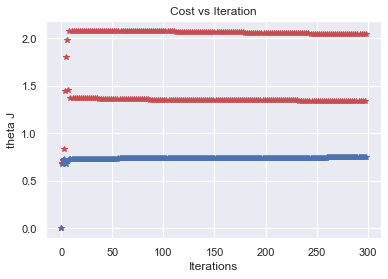

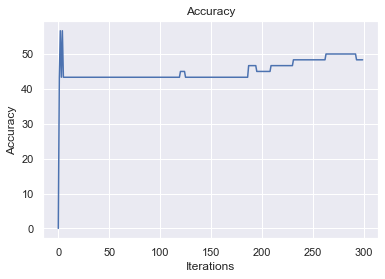

In [24]:
# Fold 1 will be trn=[df1+df2+df3] val=[df4]; tst=[df5]
fold1_ip = npy.concatenate([df1,df2,df3], axis=0)
fold1_y = npy.concatenate([y1,y2,y3], axis=0)
#------------------------------------------------------
m1 = fold1_y.size
m2 = y4.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold1_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00009
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df1+df2+df3]}
    nti = net_input(theta, fold1_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold1_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold1_y.T,npy.log(hypothesis)) + npy.dot((1-fold1_y).T,npy.log(1-hypothesis)))
    error = (fold1_y-hypothesis)
    dot = npy.dot((fold1_y-hypothesis).T, fold1_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df4]}
    nti = net_input(theta, df4)
    sg = sigmoid(nti)
    prb = probability(theta, df4)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y4.T,npy.log(hyp_v)) + npy.dot((1-y4).T,npy.log(1-hyp_v)))
    error = (y4-hyp_v)
    #dot = npy.dot((y4-hyp_v).T, df4).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df5]}
    nti = net_input(theta, df5)
    sg = sigmoid(nti)
    prb = probability(theta, df5)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y5.T,npy.log(hyp_t)) + npy.dot((1-y5).T,npy.log(1-hyp_t)))
    error = (y5-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y5))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold1_y-hypothesis).T, fold1_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold 2:

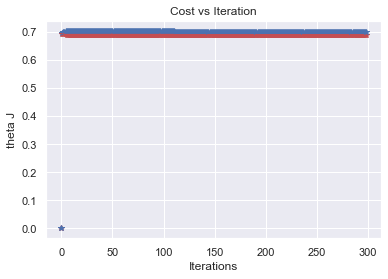

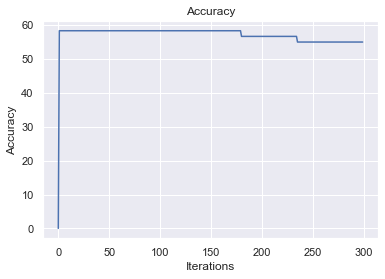

In [25]:
fold2_ip = npy.concatenate([df2,df3,df4], axis=0)
fold2_y = npy.concatenate([y2,y3,y4], axis=0)
#------------------------------------------------------
m1 = fold2_y.size
m2 = y5.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold2_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00001
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df2+df3+df4]}
    nti = net_input(theta, fold2_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold2_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold2_y.T,npy.log(hypothesis)) + npy.dot((1-fold2_y).T,npy.log(1-hypothesis)))
    error = (fold2_y-hypothesis)
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df5]}
    nti = net_input(theta, df5)
    sg = sigmoid(nti)
    prb = probability(theta, df5)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y5.T,npy.log(hyp_v)) + npy.dot((1-y5).T,npy.log(1-hyp_v)))
    error = (y5-hyp_v)
    #dot = npy.dot((y5-hyp_v).T, df5).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df1]}
    nti = net_input(theta, df1)
    sg = sigmoid(nti)
    prb = probability(theta, df1)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y1.T,npy.log(hyp_t)) + npy.dot((1-y1).T,npy.log(1-hyp_t)))
    error = (y1-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y1))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold3:

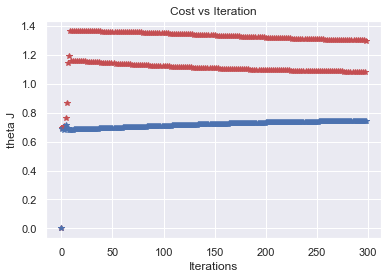

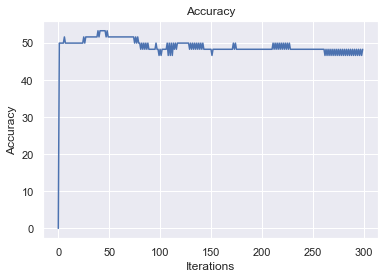

In [26]:
fold3_ip = npy.concatenate([df3,df4,df5], axis=0)
fold3_y = npy.concatenate([y3,y4,y5], axis=0)
#------------------------------------------------------
m1 = fold3_y.size
m2 = y1.size

#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold3_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00007
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df3+df4+df5]}
    nti = net_input(theta, fold3_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold3_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold3_y.T,npy.log(hypothesis)) + npy.dot((1-fold3_y).T,npy.log(1-hypothesis)))
    error = (fold3_y-hypothesis)
    dot = npy.dot((fold3_y-hypothesis).T, fold3_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df1]}
    nti = net_input(theta, df1)
    sg = sigmoid(nti)
    prb = probability(theta, df1)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y1.T,npy.log(hyp_v)) + npy.dot((1-y1).T,npy.log(1-hyp_v)))
    error = (y5-hyp_v)
    #dot = npy.dot((y5-hyp_v).T, df5).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df2]}
    nti = net_input(theta, df2)
    sg = sigmoid(nti)
    prb = probability(theta, df2)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y2.T,npy.log(hyp_t)) + npy.dot((1-y2).T,npy.log(1-hyp_t)))
    error = (y2-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y2))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold4:

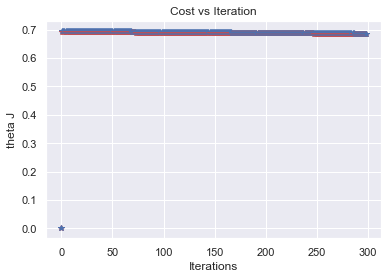

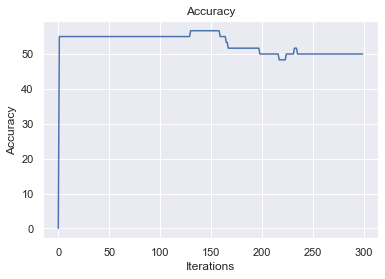

In [27]:
fold4_ip = npy.concatenate([df4,df5,df1], axis=0)
fold4_y = npy.concatenate([y4,y5,y1], axis=0)
#------------------------------------------------------
m1 = fold4_y.size
m2 = y2.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold4_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00005
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df4+df5+df1]}
    nti = net_input(theta, fold4_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold4_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold4_y.T,npy.log(hypothesis)) + npy.dot((1-fold4_y).T,npy.log(1-hypothesis)))
    error = (fold4_y-hypothesis)
    dot = npy.dot((fold4_y-hypothesis).T, fold4_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df2]}
    nti = net_input(theta, df2)
    sg = sigmoid(nti)
    prb = probability(theta, df2)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y2.T,npy.log(hyp_v)) + npy.dot((1-y2).T,npy.log(1-hyp_v)))
    error = (y2-hyp_v)
    #dot = npy.dot((y2-hyp_v).T, df2).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df3]}
    nti = net_input(theta, df3)
    sg = sigmoid(nti)
    prb = probability(theta, df3)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y3.T,npy.log(hyp_t)) + npy.dot((1-y3).T,npy.log(1-hyp_t)))
    error = (y3-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y3))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold4_y-hypothesis).T, fold4_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold5:

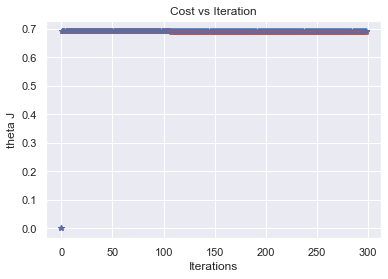

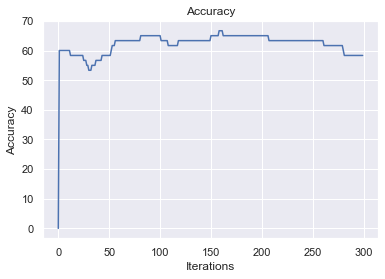

In [28]:
fold5_ip = npy.concatenate([df5,df1,df2], axis=0)
fold5_y = npy.concatenate([y5,y1,y2], axis=0)
#------------------------------------------------------
m1 = fold5_y.size
m2 = y3.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold5_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00003
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df5+df1+df2]}
    nti = net_input(theta, fold5_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold5_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold5_y.T,npy.log(hypothesis)) + npy.dot((1-fold5_y).T,npy.log(1-hypothesis)))
    error = (fold5_y-hypothesis)
    dot = npy.dot((fold5_y-hypothesis).T, fold5_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df3]}
    nti = net_input(theta, df3)
    sg = sigmoid(nti)
    prb = probability(theta, df3)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y3.T,npy.log(hyp_v)) + npy.dot((1-y3).T,npy.log(1-hyp_v)))
    error = (y3-hyp_v)
    #dot = npy.dot((y2-hyp_v).T, df2).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df4]}
    nti = net_input(theta, df4)
    sg = sigmoid(nti)
    prb = probability(theta, df4)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y4.T,npy.log(hyp_t)) + npy.dot((1-y4).T,npy.log(1-hyp_t)))
    error = (y4-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y4))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold5_y-hypothesis).T, fold5_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

# Folding (x0,x1,x3,x5,x7,x8)

In [29]:
## Testing with selective inputs
#dt.insert(0,"x0",1)
#dt
dt_ip = dt[['x0','x1','x3', 'x5', 'x7', 'x8']]
#print(dt_ip)
j = dt_ip.shape[1]
#j

In [30]:
# Split data equally

# splitting into 5 equal folds
#------------------------------------------------------
df1= npy.matrix(dt_ip.loc[0:59])
y1 = npy.matrix(y.loc[0:59]).transpose()

df2= npy.matrix(dt_ip.loc[60:119])
y2 = npy.matrix(y.loc[60:119]).transpose()

df3= npy.matrix(dt_ip.loc[120:179])
y3 = npy.matrix(y.loc[120:179]).transpose()

df4= npy.matrix(dt_ip.loc[180:239])
y4 = npy.matrix(y.loc[180:239]).transpose()

df5= npy.matrix(dt_ip.loc[240:299])
y5 = npy.matrix(y.loc[240:299]).transpose()
#------------------------------------------------------


## Plot for fold1:

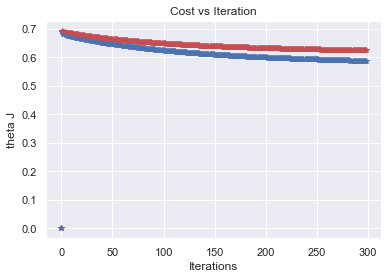

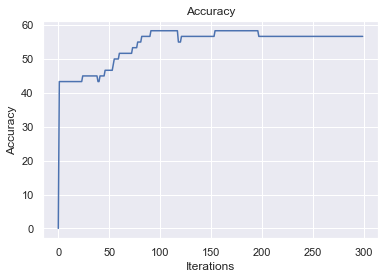

In [31]:
# Fold 1 will be trn=[df1+df2+df3] val=[df4]; tst=[df5]
fold1_ip = npy.concatenate([df1,df2,df3], axis=0)
fold1_y = npy.concatenate([y1,y2,y3], axis=0)
#------------------------------------------------------
m1 = fold1_y.size
m2 = y4.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold1_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00001
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df1+df2+df3]}
    nti = net_input(theta, fold1_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold1_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold1_y.T,npy.log(hypothesis)) + npy.dot((1-fold1_y).T,npy.log(1-hypothesis)))
    error = (fold1_y-hypothesis)
    dot = npy.dot((fold1_y-hypothesis).T, fold1_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df4]}
    nti = net_input(theta, df4)
    sg = sigmoid(nti)
    prb = probability(theta, df4)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y4.T,npy.log(hyp_v)) + npy.dot((1-y4).T,npy.log(1-hyp_v)))
    error = (y4-hyp_v)
    #dot = npy.dot((y4-hyp_v).T, df4).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df5]}
    nti = net_input(theta, df5)
    sg = sigmoid(nti)
    prb = probability(theta, df5)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y5.T,npy.log(hyp_t)) + npy.dot((1-y5).T,npy.log(1-hyp_t)))
    error = (y5-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y5))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold1_y-hypothesis).T, fold1_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold 2:

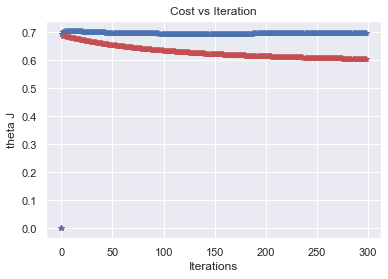

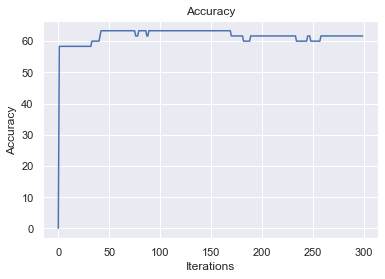

In [32]:
fold2_ip = npy.concatenate([df2,df3,df4], axis=0)
fold2_y = npy.concatenate([y2,y3,y4], axis=0)
#------------------------------------------------------
m1 = fold2_y.size
m2 = y5.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold2_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00001
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df2+df3+df4]}
    nti = net_input(theta, fold2_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold2_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold2_y.T,npy.log(hypothesis)) + npy.dot((1-fold2_y).T,npy.log(1-hypothesis)))
    error = (fold2_y-hypothesis)
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df5]}
    nti = net_input(theta, df5)
    sg = sigmoid(nti)
    prb = probability(theta, df5)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y5.T,npy.log(hyp_v)) + npy.dot((1-y5).T,npy.log(1-hyp_v)))
    error = (y5-hyp_v)
    #dot = npy.dot((y5-hyp_v).T, df5).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df1]}
    nti = net_input(theta, df1)
    sg = sigmoid(nti)
    prb = probability(theta, df1)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y1.T,npy.log(hyp_t)) + npy.dot((1-y1).T,npy.log(1-hyp_t)))
    error = (y1-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y1))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold3:

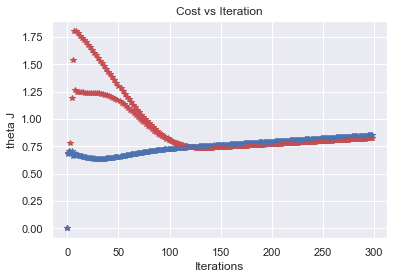

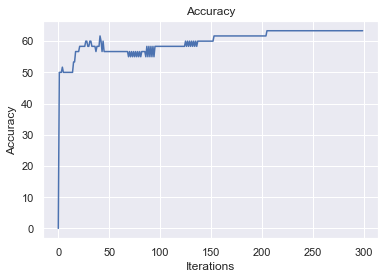

In [33]:
fold3_ip = npy.concatenate([df3,df4,df5], axis=0)
fold3_y = npy.concatenate([y3,y4,y5], axis=0)
#------------------------------------------------------
m1 = fold3_y.size
m2 = y1.size

#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold3_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00008
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df3+df4+df5]}
    nti = net_input(theta, fold3_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold3_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold3_y.T,npy.log(hypothesis)) + npy.dot((1-fold3_y).T,npy.log(1-hypothesis)))
    error = (fold3_y-hypothesis)
    dot = npy.dot((fold3_y-hypothesis).T, fold3_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df1]}
    nti = net_input(theta, df1)
    sg = sigmoid(nti)
    prb = probability(theta, df1)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y1.T,npy.log(hyp_v)) + npy.dot((1-y1).T,npy.log(1-hyp_v)))
    error = (y5-hyp_v)
    #dot = npy.dot((y5-hyp_v).T, df5).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df2]}
    nti = net_input(theta, df2)
    sg = sigmoid(nti)
    prb = probability(theta, df2)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y2.T,npy.log(hyp_t)) + npy.dot((1-y2).T,npy.log(1-hyp_t)))
    error = (y2-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y2))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold2_y-hypothesis).T, fold2_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold4:

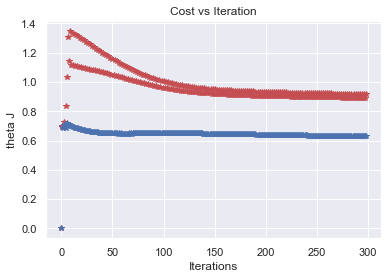

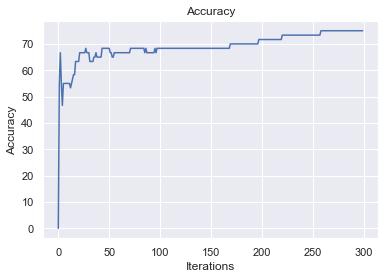

In [34]:
fold4_ip = npy.concatenate([df4,df5,df1], axis=0)
fold4_y = npy.concatenate([y4,y5,y1], axis=0)
#------------------------------------------------------
m1 = fold4_y.size
m2 = y2.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold4_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00007
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df4+df5+df1]}
    nti = net_input(theta, fold4_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold4_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold4_y.T,npy.log(hypothesis)) + npy.dot((1-fold4_y).T,npy.log(1-hypothesis)))
    error = (fold4_y-hypothesis)
    dot = npy.dot((fold4_y-hypothesis).T, fold4_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df2]}
    nti = net_input(theta, df2)
    sg = sigmoid(nti)
    prb = probability(theta, df2)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y2.T,npy.log(hyp_v)) + npy.dot((1-y2).T,npy.log(1-hyp_v)))
    error = (y2-hyp_v)
    #dot = npy.dot((y2-hyp_v).T, df2).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df3]}
    nti = net_input(theta, df3)
    sg = sigmoid(nti)
    prb = probability(theta, df3)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y3.T,npy.log(hyp_t)) + npy.dot((1-y3).T,npy.log(1-hyp_t)))
    error = (y3-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y3))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold4_y-hypothesis).T, fold4_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()

## Plot for fold5:

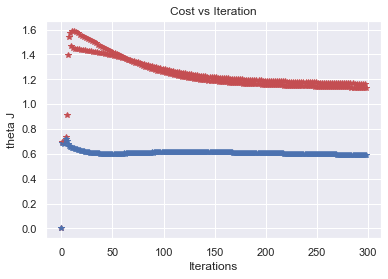

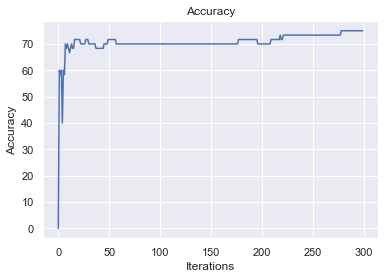

In [35]:
fold5_ip = npy.concatenate([df5,df1,df2], axis=0)
fold5_y = npy.concatenate([y5,y1,y2], axis=0)
#------------------------------------------------------
m1 = fold5_y.size
m2 = y3.size
#------------------------------------------------------
def sigmoid(x):
    return 1 / (1 + npy.exp(-x))
#print(sigmoid(0.5)) ... put this in hyp_0

def net_input(theta, x):
    return npy.dot(x, theta)
#print(net_input(0.5,0.25))

def probability(theta, x):
    return sigmoid(net_input(theta, x))
#print(probability(0.25,0.5))

def linearEq(theta, dt_ip):
    return dt_ip.multiply(theta)
#------------------------------------------------------
init_theta = npy.zeros((fold5_ip.shape[1],1))
#print(init_theta)
theta = init_theta
acc_tst = npy.zeros(shape=(1,m))
cost = npy.zeros(shape=(1,m))
cost_v = npy.zeros(shape=(1,m))
cost_t = npy.zeros(shape=(1,m))
alpha = 0.00008
#------------------------------------------------------
for k in range(1, m):
    #------------------------------------------------------
    #training set {trn=[df5+df1+df2]}
    nti = net_input(theta, fold5_ip)
    sg = sigmoid(nti)
    prb = probability(theta, fold5_ip)
    #print(nti,sg,prb)
    hypothesis = prb
    cost[0][k] = -(1/m1) * npy.sum(npy.dot(fold5_y.T,npy.log(hypothesis)) + npy.dot((1-fold5_y).T,npy.log(1-hypothesis)))
    error = (fold5_y-hypothesis)
    dot = npy.dot((fold5_y-hypothesis).T, fold5_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
    #validation set {val=[df3]}
    nti = net_input(theta, df3)
    sg = sigmoid(nti)
    prb = probability(theta, df3)
    #print(nti,sg,prb)
    hyp_v =  prb
    cost_v[0][k] = -(1/m2) * npy.sum(npy.dot(y3.T,npy.log(hyp_v)) + npy.dot((1-y3).T,npy.log(1-hyp_v)))
    error = (y3-hyp_v)
    #dot = npy.dot((y2-hyp_v).T, df2).T
    #theta = theta +(alpha/m2)*dot
    #------------------------------------------------------
    #testing set {tst=[df4]}
    nti = net_input(theta, df4)
    sg = sigmoid(nti)
    prb = probability(theta, df4)
    #print(nti,sg,prb)
    hyp_t = prb
    cost_t[0][k] = -(1/m2) * npy.sum(npy.dot(y4.T,npy.log(hyp_t)) + npy.dot((1-y4).T,npy.log(1-hyp_t)))
    error = (y4-hyp_t)
    acc_tst[0][k] = 100 - (npy.mean(npy.abs(npy.round(hyp_t)-y4))*100) 
    #------------------------------------------------------
    #weight update....
    dot = npy.dot((fold5_y-hypothesis).T, fold5_ip).T
    theta = theta +(alpha/m1)*dot
    #------------------------------------------------------
#print(acc_tst)
#------------------------------------------------------

dfg = npy.linspace(0,m-1,m)
#print(dfg)
#------------------------------------------------------
for gp in range(m-1):
    #print(dfg[gp])
    Trn = mtp.plot(dfg[gp], cost[0][gp], 'r*', label='training')
    Vld = mtp.plot(dfg[gp], cost_v[0][gp], 'b*', label='validation')
#------------------------------------------------------
mtp.ylabel('theta J')
mtp.xlabel('Iterations')
mtp.title('Cost vs Iteration')
mtp.show()

#Testing accuracy
mtp.plot(acc_tst.T)
mtp.ylabel('Accuracy')
mtp.xlabel('Iterations')
mtp.title('Accuracy')
mtp.show()